2025-06-05 01:50:54.106076: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749088254.504005      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749088254.615158      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 42000 images belonging to 6 classes.
Found 9000 images belonging to 6 classes.
Found 9000 images belonging to 6 classes.


I0000 00:00:1749088328.866523      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1749088328.867220      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 224, 224, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 224, 224, 3)    │              7 │ rescaling[0][0]        │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_1 (Rescaling)   │ (None, 224, 224, 3)    │              0 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 225, 225, 3)    │              0 │ rescaling_1[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 112, 112, 32)   │            864 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 112, 112, 32)   │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 112, 112, 32)   │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 112, 112, 32)   │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 112, 112, 32)   │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 112, 112, 32)   │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_expand    

 Total params: 20,107,689 (76.70 MB)

 Trainable params: 16,058,118 (61.26 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30


I0000 00:00:1749088349.489768     117 service.cc:148] XLA service 0x7d4dfc04cc80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1749088349.491531     117 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1749088349.491557     117 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1749088351.406423     117 cuda_dnn.cc:529] Loaded cuDNN version 90300


   2/1313 ━━━━━━━━━━━━━━━━━━━━ 1:11 54ms/step - accuracy: 0.1875 - loss: 6.2075   

I0000 00:00:1749088361.817159     117 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 634s 461ms/step - accuracy: 0.8951 - loss: 0.7414 - val_accuracy: 0.9922 - val_loss: 0.0327
Epoch 2/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 177s 135ms/step - accuracy: 0.9704 - loss: 0.1526 - val_accuracy: 0.9932 - val_loss: 0.0347
Epoch 3/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 176s 134ms/step - accuracy: 0.9718 - loss: 0.1522 - val_accuracy: 0.9964 - val_loss: 0.0203
Epoch 4/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 178s 136ms/step - accuracy: 0.9774 - loss: 0.1215 - val_accuracy: 0.9959 - val_loss: 0.0337
Epoch 5/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 176s 134ms/step - accuracy: 0.9830 - loss: 0.0698 - val_accuracy: 0.9953 - val_loss: 0.0299
Epoch 6/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 183s 139ms/step - accuracy: 0.9799 - loss: 0.1320 - val_accuracy: 0.9973 - val_loss: 0.0198
Epoch 7/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 175s 133ms/step - accuracy: 0.9860 - loss: 0.0779 - val_accuracy: 0.9963 - val_loss: 0.0272
Epoch 8/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 179s 136ms/step - accuracy: 0.9

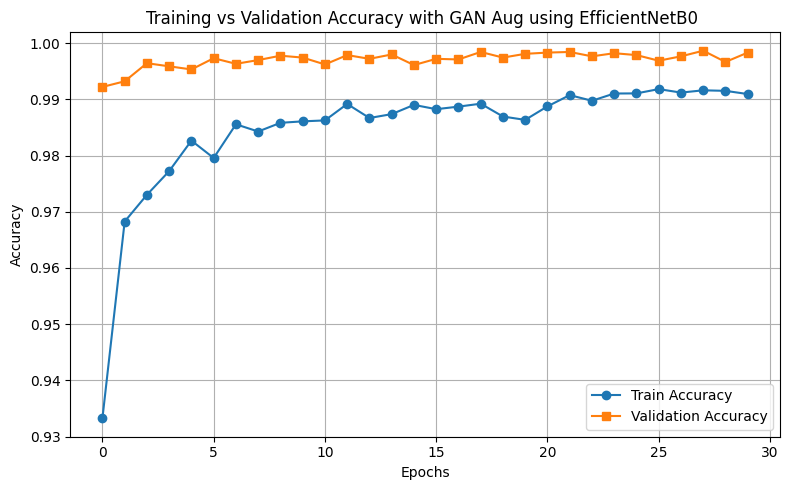

282/282 ━━━━━━━━━━━━━━━━━━━━ 108s 383ms/step - accuracy: 0.9991 - loss: 0.1199
Test Accuracy: 0.9987
282/282 ━━━━━━━━━━━━━━━━━━━━ 43s 130ms/step

Classification Report with GAN Aug EfficientNetB0:
                    precision    recall  f1-score   support

       ANTHRECNOSE       1.00      1.00      1.00      1500
           DIEBACK       1.00      1.00      1.00      1500
  GALLMILDGEDAMAGE       1.00      1.00      1.00      1500
           HEALTHY       1.00      1.00      1.00      1500
INSECTDAMAGEWEBBER       1.00      1.00      1.00      1500
        LEAFBLIGHT       1.00      1.00      1.00      1500

          accuracy                           1.00      9000
         macro avg       1.00      1.00      1.00      9000
      weighted avg       1.00      1.00      1.00      9000



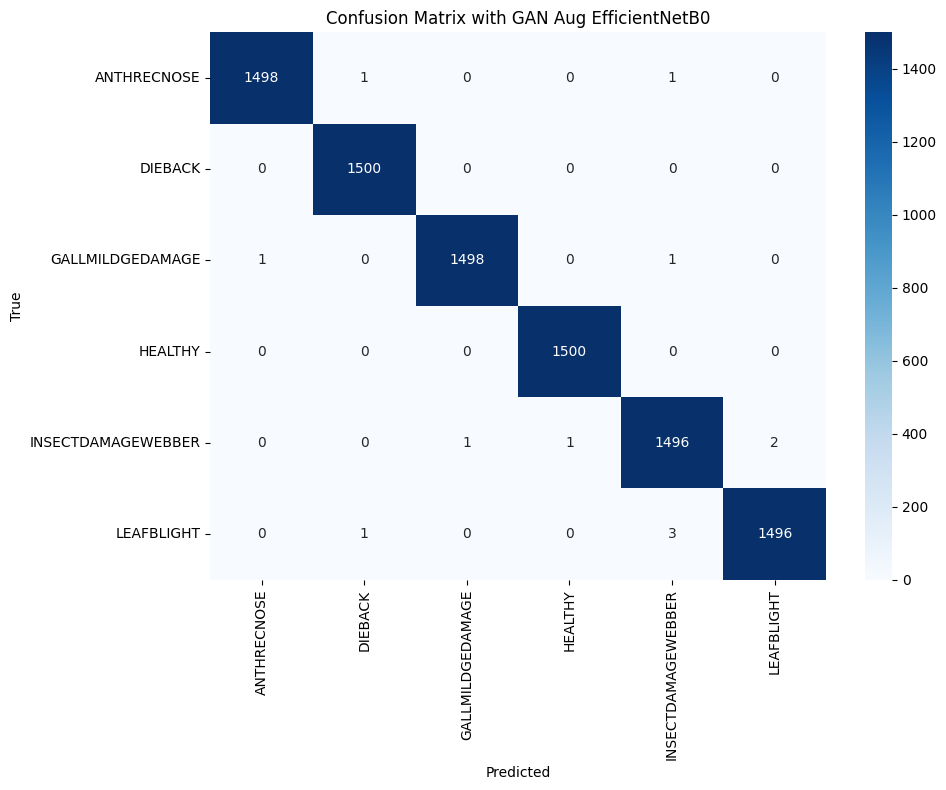

In [1]:
import tensorflow as tf
from tensorflow.keras.applications import (
    EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3,
    EfficientNetB4, EfficientNetB5, EfficientNetB6, EfficientNetB7
)
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --------- SETTINGS ---------
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
NUM_CLASSES = 6  # Adjust to your dataset
EPOCHS = 30
DATA_DIR = '/kaggle/input/ganmango224x224/GANDataset224X224/'

# --------- CHOOSE EfficientNet VERSION HERE ---------
EffNetModel = EfficientNetB0  # Change to B1, B2, ..., B7 if needed

# --------- DATA GENERATORS (No Augmentation) ---------
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_loader = train_gen.flow_from_directory(
    DATA_DIR + 'train',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_loader = val_gen.flow_from_directory(
    DATA_DIR + 'val',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_loader = test_gen.flow_from_directory(
    DATA_DIR + 'test',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# --------- MODEL SETUP ---------
base_model = EffNetModel(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze convolutional base

x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(NUM_CLASSES, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# --------- TRAINING ---------
history = model.fit(
    train_loader,
    validation_data=val_loader,
    epochs=EPOCHS
)

# --------- PLOT ACCURACY ---------
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy with GAN Aug using EfficientNetB0 ')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --------- TEST EVALUATION ---------
test_loss, test_acc = model.evaluate(test_loader)
print(f"Test Accuracy: {test_acc:.4f}")

# --------- CLASSIFICATION REPORT ---------
y_probs = model.predict(test_loader)
y_pred = np.argmax(y_probs, axis=1)
y_true = test_loader.classes
class_names = list(test_loader.class_indices.keys())

print("\nClassification Report with GAN Aug EfficientNetB0:")
print(classification_report(y_true, y_pred, target_names=class_names))

# --------- CONFUSION MATRIX ---------
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix with GAN Aug EfficientNetB0")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()
